In [89]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Summary of paper: Fast retrievals of test-pad coordinates from photo images of printed circuit boards, By Swee Chuan Tan and Schumann Tong Wei Kit, 2016 International Conference on Advanced Mechatronic Systems (ICAMechS), 2016 [1]

### 1. The paper I will be summarizing can be found here: https://ieeexplore.ieee.org/document/7813492/authors#authors
### The data used in this paper: Printed Circuit Board Processed Image by Swee Chuan Tan [10], can be found here: https://archive.ics.uci.edu/dataset/990/printed+circuit+board+processed+image 

## Explanation of terms
1. Printed Circuit Board (PCB)- A printed circuit board is an essential unit of an electronic device which serves as the base for connecting and powering components to create a single, fully functional electronic circuit that can power and control the device. [2] It's a mechanical base used to hold and connect the components of an electric circuit. PCBs are used in nearly all modern consumer electronic devices and accessories, including phones, tablets, smartwatches, wireless chargers, and power supplies [3]

2. Test-pad of PCB - A test point in a PCB is an exposed copper pad that can be used to check whether a circuit is functioning to specification. During production, users can inject test signals via probes through the test points to detect potential issues. [4] A signal or power net is exposed, and can be connected to by an external probe. Bare PCBs are usually tested for short- and open-circuits using the component pads themselves, and this is usually done with a “flying probe” tester. [5]

3. Reverse engineering - Reverse-engineering is the act of dismantling an object to see how it works. It is done primarily to analyze and gain knowledge about the way something works but often is used to duplicate or enhance the object.[6] 

4. Flying probe testers - A flying probe test is a testing method for electronic circuits primarily used to test PCBs. It employs a system of movable probes that virtually "fly" over the circuit board, making electrical contact with specific test points on the PCB. 
Ultimately, it identifies defects and verifies the electrical performance of the circuit. The flying probe test system consists of several key components, including the probes themselves, a test fixture to hold the PCB in place, and control software to manage the testing process[7]

5. Short circuit - A bad electrical connection that causes the current to flow in the wrong direction, often having the effect of stopping the power supply. [8]

6. Open circuit - A circuit in which the continuity is broken due to which the electric current can not flow [9]

7. Two-Step cluster - The TwoStep Cluster node provides a form of cluster analysis. It can be used to cluster the dataset into distinct groups when you don't know what those groups are at the beginning. As with Kohonen nodes and K-Means nodes, TwoStep Cluster models do not use a target field. Instead of trying to predict an outcome, TwoStep Cluster tries to uncover patterns in the set of input fields. Records are grouped so that records within a group or cluster tend to be similar to each other, but records in different groups are dissimilar. [11]

8. IBM's SPSS TwoStep Clustering is a proprietary clustering method that combines pre-clustering (subcluster formation) and hierarchical clustering into one streamlined process (This is the one used in paper, but we will reproduce it with python) [12]

9. DBSCAN is a clustering algorithm designed to identify groups of points (clusters) in a dataset based on their density. Unlike K-Means or hierarchical clustering, DBSCAN can handle noise and clusters of arbitrary shapes, making it particularly useful for datasets with outliers or irregularly shaped clusters. [13]

## Summary 
### The aim of this paper
In the paper “Fast retrievals of test-pad coordinates from photo images of printed circuit boards" Tan and Kit (2016) [1] present a new data analytic technique on how to recover test-pad information from photo images of printed circuit boards (PCBs) This technique is particularly useful for reverse engineering  printed circuit boards(PCB's) in situations where documentation is incomplete or unavailable. The retrieved test-pad coordinates serve as crucial input for robotic flying probe testers, which are mechatronic systems capable of performing a wide range of diagnostic tests on PCBs without requiring circuit board schematics.
### Introductory problem statement
The authors highlight the growing importance of data analytics in solving complex and tedious problems, such as reverse engineering of electronic components. Legacy systems, often deployed in industrial or military applications, typically lack adequate documentation, which complicates maintenance and repair tasks. Issues such as missing schematics, obsolete components, and insufficient vendor support are common. Among these challenges, the absence of circuit-board-level information can significantly hinder repair processes.

To address this issue, the paper proposes a method to automate the identification of test pads on PCB images. Test pads are essential for guiding robotic flying probe testers in conducting diagnostic tasks such as connectivity tests, component testing, and voltage or impedance measurements. While manual identification of test pads is feasible, it is time-consuming and prone to human error. The proposed approach leverages clustering techniques to automate this process, thereby enhancing efficiency and accuracy.

### Methods of reverse engineering and the appoach the authors take
The paper highlights two main approaches to PCB reverse engineering: the destructive approach, which involves physically deconstructing the PCB to recover detailed design information but causes permanent damage, and the non-destructive approach, which preserves the PCB and uses techniques like image analysis to extract specific details, such as netlists. The choice between these methods depends on the amount of information needed and the feasibility of preserving the board. This paper focuses on a non-destructive method for identifying test-pad locations using clustering analysis, emphasizing the need for high precision and recall to minimize errors while maintaining the PCB's integrity.

### Data and methods used in the paper
**1.The analysis begins** with a digital image of a printed circuit board (PCB), provided with permission from the image owner. Using a Java program, the location and color attributes of each pixel in the image are extracted into a numerical dataset. Each pixel is described by five variables: X and Y, which indicate the pixel’s horizontal and vertical positions, and R, G, and B, which represent the red, green, and blue color intensities respectively, each ranging from 0 to 255. The dataset comprises 71,040 observations, corresponding to the 71,040 pixels in the image. The primary goal of this project is to identify the locations of test pads, which appear as gray circular dots on the PCB.

To achieve this, a two-stage clustering approach is employed. The first stage groups the pixels by their color attributes to identify gray pixels corresponding to test pads. The second stage clusters these gray pixels based on their spatial locations to define individual test pads while filtering out noise. This method ensures accurate identification of test pads with minimal errors.

**2.In the first stage of the method**, the focus is on clustering the pixels from the PCB image based on their color attributes (R, G, and B values). The PCB image contains several predominant colors, including various shades of green, white, black, and gray. The objective in this stage is to isolate clusters of gray pixels, as these correspond to the test pads on the PCB. Gray pixels are identified based on the common characteristic where the red (R), green (G), and blue (B) color intensities are approximately equal (R ≈ G ≈ B).

To achieve this, the K-Means clustering algorithm is applied to the RGB data. The estimated number of clusters ranges from 10 to 12, reflecting the variety of colors present in the PCB image. Three clustering solutions (10, 11, and 12 clusters) are generated to determine the most suitable one for isolating gray pixels. The 12-cluster solution is found to be optimal, as it includes two clusters with average RGB values closest to gray: Cluster 1: R=131, G=147, B=153. and Cluster 2: R=93, G=113, B=115.

These two clusters are identified as representing gray pixels corresponding to test pads. To validate this identification, the spatial distribution of the gray pixel records is plotted using their X and Y coordinates. The resulting scatter plot demonstrates that the layout of these gray pixels closely resembles the actual distribution of test pads on the PCB, confirming the effectiveness of the clustering process in this stage.

**3.In the second stage**, gray pixels identified earlier are clustered based on their spatial coordinates (X and Y) to locate individual test pads. While the PCB contains 120 legitimate test pads, approximately 50 sporadic gray pixels act as noise. To address this, 170 clusters are created to separate noise, and clusters with fewer than 10 pixels are excluded as they likely represent noise. The centroids of the remaining clusters are identified as test-pad locations.

Two-Step clustering outperforms K-Means in this task due to its pre-clustering step, which isolates sporadic pixels into smaller clusters, preventing them from merging with legitimate test-pad clusters. K-Means, in contrast, is more prone to errors as it can misclassify noise as test pads. The Two-Step method thus ensures more accurate and reliable test-pad identification by effectively handling noise.

This two-stage clustering process successfully identifies the test-pad locations on the PCB. By combining color-based clustering to isolate gray pixels with spatial clustering to group them into test pads, the method ensures high precision and recall. The use of Two-Step clustering further enhances accuracy by effectively handling noise, making this approach a reliable and efficient solution for PCB reverse engineering

### Results
The results of the Two-Step clustering method demonstrate high accuracy, as nearly all 120 legitimate test pads on the PCB were correctly identified. An overlay of the clustering output on the PCB image confirms the alignment of cluster centroids with test pad locations. However, upon closer inspection, some errors are noted: five points were incorrectly identified as test pads, and three duplicate test pads were generated for larger test pads. These eight irrelevant points reduce the precision to 93.75% (120 out of 128 identified points), though the recall remains at 100%.

Importantly, the errors are minimal and can be easily corrected through visual inspection or post-processing, showcasing the robustness and reliability of the two-stage clustering approach for recovering test-pad locations which would be really helpful in the field of work .

## Reproducing the experiment 

1. For that we will be using the Printed Circuit Board dataset from UC Irvine[10]
- This data is published by the same author and it's the one used in the paper.
- There are more observations (pixels) here than that in the paper due to different extraction method. (This could lead to different results, so let's see) As the original has 71 000 observations, this data has 720 000 observations

2. Let's first read the data

In [41]:
data = pd.read_csv('TestPad_PCB_XYRGB_V2.csv')

In [43]:
data

X    Y         R         G         B  Grey
0       105    0  0.909804  0.976471  0.937255     0
1       106    0  0.792157  0.901961  0.843137     0
2       107    0  0.631373  0.788235  0.694118     0
3       108    0  0.474510  0.670588  0.556863     0
4       109    0  0.341176  0.584314  0.439216     0
...     ...  ...       ...       ...       ...   ...
723547  961  778  0.745098  0.917647  0.811765     0
723548  962  778  0.749020  0.917647  0.811765     0
723549  963  778  0.752941  0.909804  0.807843     0
723550  964  778  0.756863  0.905882  0.807843     0
723551  965  778  0.752941  0.901961  0.803922     0

[723552 rows x 6 columns]

3. Let's now reproduce the experiment step by step

4. First let's apply K-Means clustering to the RGB values of pixels in the dataset, grouping them into 12 color clusters as described in the paper.

In [66]:
# Apply K-Means clustering to RGB attributes
num_color_clusters = 12  # Based on the paper
kmeans_color = KMeans(n_clusters=num_color_clusters, random_state=42)
data['ColorCluster'] = kmeans_color.fit_predict(data[['R', 'G', 'B']])

5. Then we will calculate the average RGB values for each cluster formed by K-Means and identify clusters where the RGB values are nearly equal, indicating gray pixels (R ≈ G ≈ B). It filters these clusters using a threshold (< 0.1) to isolate those that correspond to gray colors. These gray clusters will later be used to extract gray pixels, likely representing test pads.
6. **NOTE:** The concept of identifying gray clusters by analyzing the mean RGB values is consistent with the paper, but the specific implementation details (like calculating mean values and applying a numerical threshold) are improvised based on the paper's guidance. The paper does not explicitly state how to perform this step but implies the need to isolate gray clusters based on their RGB characteristics.

In [68]:
# Calculate the mean RGB values for each cluster
cluster_means = data.groupby('ColorCluster')[['R', 'G', 'B']].mean()

# Identify gray clusters (R ≈ G ≈ B)
gray_clusters = cluster_means[
    ((cluster_means['R'] - cluster_means['G']).abs() < 0.1) &
    ((cluster_means['R'] - cluster_means['B']).abs() < 0.1)
]

7. Now let's filter out the pixels belonging to the identified gray clusters and create a new dataset (gray_pixels) containing only those pixels. Then we will plot the spatial distribution of these gray pixels (X, Y coordinates) on a scatter plot, showing their locations on the PCB. These pixels, likely representing test pads, are visualized in gray for further processing.

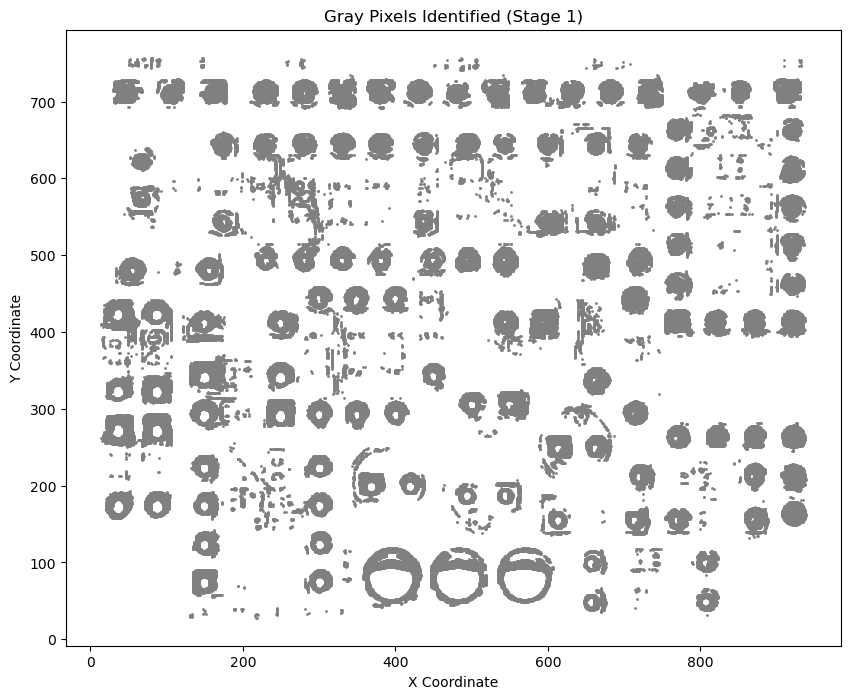

In [77]:
# Filter gray pixels
gray_pixels = data[data['ColorCluster'].isin(gray_clusters.index)]

# Plot gray pixel clusters
plt.figure(figsize=(10, 8))
plt.scatter(gray_pixels['X'], gray_pixels['Y'], c='gray', s=1)
plt.title("Gray Pixels Identified (Stage 1)")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

### **8. Comparison with the result from the paper**

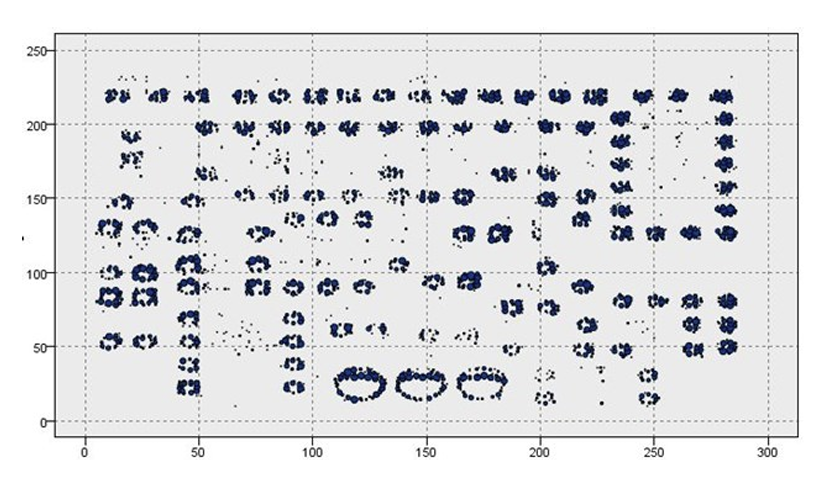

9. They look relatively the same, but with some differences, which could be brought down to the facts:
- The data now includes more pixels than the one in the paper.
- The method of identifying the grey clusters follows the idea of the paper, but there isn't a concrete statement on how to perform it so I did my best

10. This is **STEP ONE** of the process now let's proceed to step two where we will compare K-means and Two-Step clustering
**NOTE** AS TWO STEP CLUSTERING HAS BEEN DONE IN IBM SPSS statistics. I will replicate the methodology using Python libraries such as scikit-learn (DBSCAN)

11. Now let's proceed to **STEP TWO** where we will perform another clustering while comparing K-means VS Two-Step clustering ()
12. Let's apply K-Means clustering to the spatial coordinates (X, Y) of gray pixels, grouping them into 170 clusters. Clusters with fewer than 10 pixels are filtered out as noise, and the remaining clusters are visualized to identify test pad locations on the PCB. Each test pad cluster is represented by a unique color in the scatter plot.

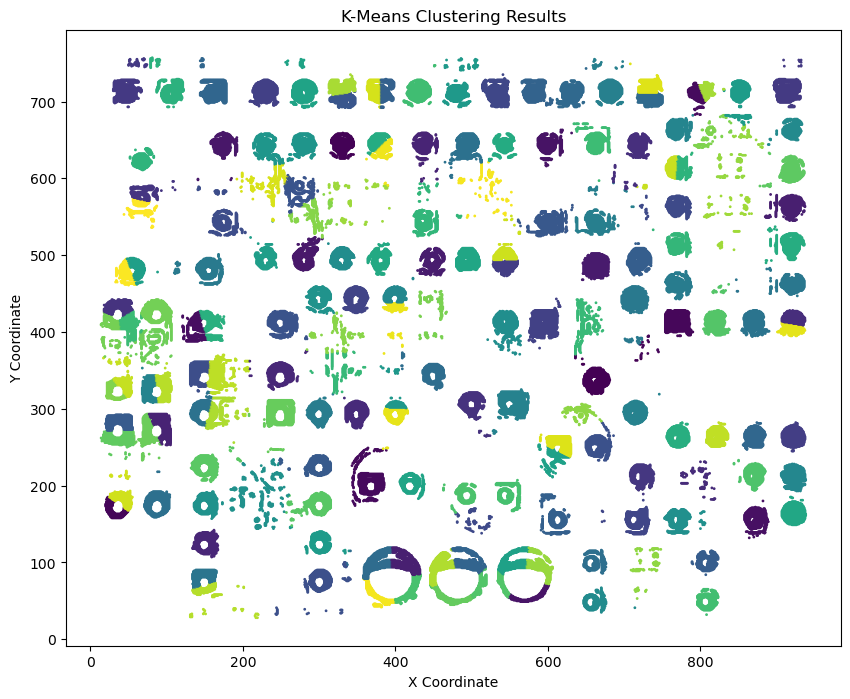

In [123]:
# Apply K-Means clustering to spatial coordinates
num_spatial_clusters = 170  # As per the paper
kmeans_spatial = KMeans(n_clusters=num_spatial_clusters, random_state=42)
gray_pixels.loc[:, 'KMeansCluster'] = kmeans_spatial.fit_predict(gray_pixels[['X', 'Y']])

# Filter clusters with fewer than 10 pixels
cluster_sizes = gray_pixels['KMeansCluster'].value_counts()
valid_clusters = cluster_sizes[cluster_sizes > 10].index
test_pads_kmeans = gray_pixels[gray_pixels['KMeansCluster'].isin(valid_clusters)]

# Visualize K-Means clustering results
plt.figure(figsize=(10, 8))
plt.scatter(test_pads_kmeans['X'], test_pads_kmeans['Y'], c=test_pads_kmeans['KMeansCluster'], cmap='viridis', s=1)
plt.title("K-Means Clustering Results")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


In [159]:
# Count the unique clusters for K-Means
detected_test_pads_kmeans = len(test_pads_kmeans['KMeansCluster'].unique())
print(f"Number of detected test pads (K-Means): {detected_test_pads_kmeans}")

# Compare with the ground truth
if detected_test_pads_kmeans >= 120:
    print("K-Means successfully detected all 120 test pads.")
else:
    print(f"K-Means detected {detected_test_pads_kmeans}, which is not the full 120.")


Number of detected test pads (K-Means): 170
K-Means successfully detected all 120 test pads.


13. Now let's try the improvised Two-step clustering. First let's use DBSCAN to isolate sporadic gray pixels as noise and group dense regions into subclusters.
- eps (Epsilon) The maximum distance between two points for them to be considered neighbors.
- min_samples : The minimum number of points required to form a dense region (a cluster). In our case 10

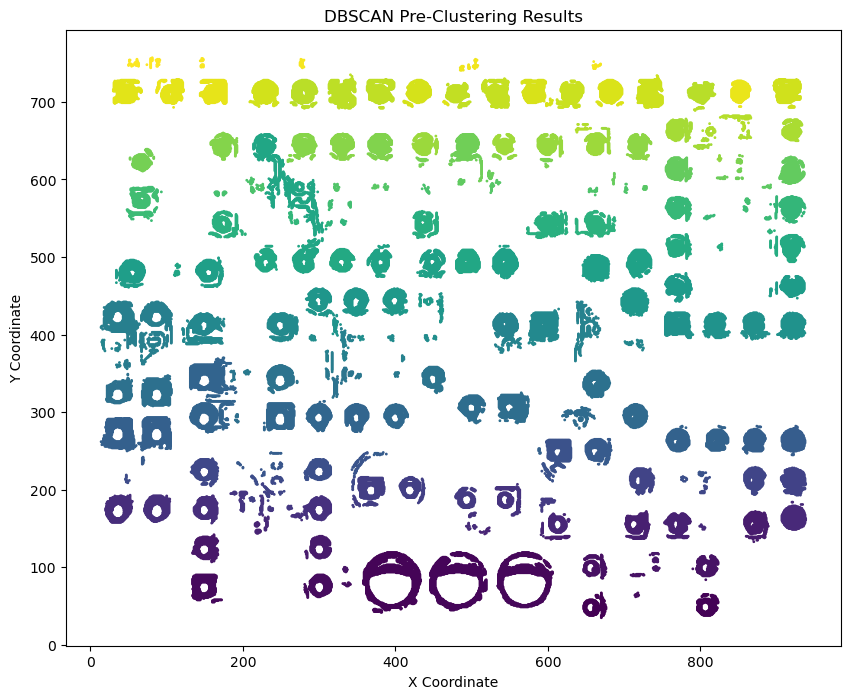

In [130]:
dbscan = DBSCAN(eps=5, min_samples=10)  # Adjust eps and min_samples as needed (min 10 points(pixels) to form a cluster)
gray_pixels.loc[:, 'DBSCANCluster'] = dbscan.fit_predict(gray_pixels[['X', 'Y']])

# Filter out noise (DBSCAN labels noise as -1)
preclustered_data = gray_pixels[gray_pixels['DBSCANCluster'] != -1]

# Visualize DBSCAN pre-clustering results
plt.figure(figsize=(10, 8))
plt.scatter(preclustered_data['X'], preclustered_data['Y'], c=preclustered_data['DBSCANCluster'], cmap='viridis', s=1)
plt.title("DBSCAN Pre-Clustering Results")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

14. As it can be seen the plot is a bit cleaner, meaning noise has been removed to some extent
15. Now let's apply K-Means to the pre-clustered data from DBSCAN to refine test pad clusters. (Two-step)

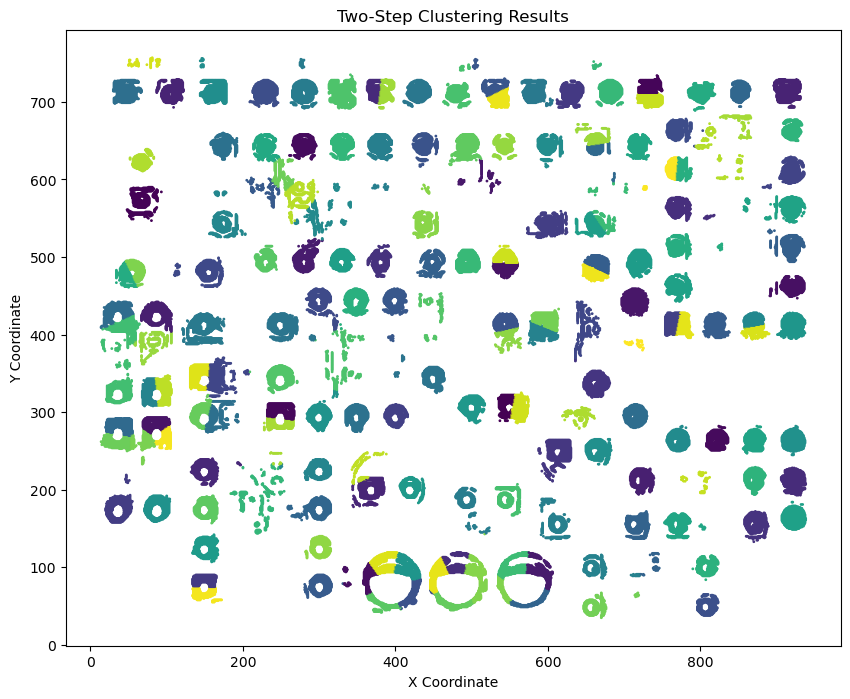

In [138]:
# Apply K-Means on pre-clustered data
kmeans_final = KMeans(n_clusters=170, random_state=42) # as stated in the paper
preclustered_data.loc[:, 'FinalCluster'] = kmeans_final.fit_predict(preclustered_data[['X', 'Y']])

# Filter clusters with fewer than 10 pixels
final_cluster_sizes = preclustered_data['FinalCluster'].value_counts()
valid_clusters = final_cluster_sizes[final_cluster_sizes > 10].index
test_pads_two_step = preclustered_data[preclustered_data['FinalCluster'].isin(valid_clusters)]

# Visualize Two-Step clustering results
plt.figure(figsize=(10, 8))
plt.scatter(test_pads_two_step['X'], test_pads_two_step['Y'], c=test_pads_two_step['FinalCluster'], cmap='viridis', s=1)
plt.title("Two-Step Clustering Results")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()


In [163]:
# Count the unique clusters for Two-Step
detected_test_pads_two_step = len(test_pads_two_step['FinalCluster'].unique())
print(f"Number of detected test pads (Two-Step): {detected_test_pads_two_step}")

# Compare with the ground truth
if detected_test_pads_two_step >= 120:
    print("Two-Step clustering successfully detected all 120 test pads.")
else:
    print(f"Two-Step clustering detected {detected_test_pads_two_step}, which is not the full 120.")


Number of detected test pads (Two-Step): 170
Two-Step clustering successfully detected all 120 test pads.


16. At first glance I cannot see much difference, maybe the difference is so little it cannot be seen by the eye, but metrics, should show. But we know it captures all clusters 
17. Let's set the test pads to 120 as it is in the paper and evaluate the two methods

In [155]:
true_test_pads = 120  # As per the paper

# Evaluate K-Means Clustering
detected_test_pads_kmeans = len(test_pads_kmeans['KMeansCluster'].unique())
precision_kmeans = true_test_pads / detected_test_pads_kmeans
recall_kmeans = true_test_pads / true_test_pads 
print(f"K-Means Precision: {precision_kmeans * 100:.2f}%")
print(f"K-Means Recall: {recall_kmeans * 100:.2f}%")

# Evaluate Two-Step Clustering
detected_test_pads_two_step = len(test_pads_two_step['FinalCluster'].unique())
precision_two_step = true_test_pads / detected_test_pads_two_step
recall_two_step = true_test_pads / true_test_pads  
print(f"Two-Step Precision: {precision_two_step * 100:.2f}%")
print(f"Two-Step Recall: {recall_two_step * 100:.2f}%")


K-Means Precision: 70.59%
K-Means Recall: 100.00%
Two-Step Precision: 70.59%
Two-Step Recall: 100.00%


18. Interestingly, the recall and precision for both methods is the same in my scenario, let's see it there is any difference at all

In [143]:
# For K-Means
print(test_pads_kmeans['KMeansCluster'].value_counts())

# For Two-Step
print(test_pads_two_step['FinalCluster'].value_counts())


KMeansCluster
33     1175
74     1009
130     927
3       919
68      899
       ... 
141     136
145     112
21      111
144     110
37       85
Name: count, Length: 170, dtype: int64
FinalCluster
122    981
69     966
16     878
27     876
10     859
      ... 
146    142
11     121
154     79
158     78
169     47
Name: count, Length: 170, dtype: int64


19. Looks like there is a bit of a difference, but the noise reduction is minimal so that's why it could not be an impact

### Results from reproduction 

1. As it can be seen my results differ from the paper's results, mainly in precission. In the paper they achieve Precision = 93.25% and I achieve only 70.59%, even though I followed the paper's logic.
2. But there are some factors that could cause this:
- First the dataset I now use has 10 times more observations than the one used in the paper as the extraction method was different and in the first comparison between the picture of the paper and mine it can be seen that using this dataset we have much more noise and pixel points in the plots.
- Second they use IBM's SPSS's integrated method Two Step clustering while here I tried to replicate that in Python following the logic of how it works
- Third, there wasn't an exact instruction on how to implement (and calculating mean values and applying a numerical threshold) are improvised based on the paper's guidance. The paper does not explicitly state how to perform this step but implies the need to isolate gray clusters based on their RGB characteristics.

3. Despite that I think I achieved good results on reproducing the paper by following the steps, even though without explicit instructions and difference in data. Meaning the paper provides a good outline on how the process is supposed to happen.

## References
[1] Tan, S. C., & Kit, S. T. W. (2016). Fast retrievals of test-pad coordinates from photo images of printed circuit boards. 2016 International Conference on Advanced Mechatronic Systems (ICAMechS), 464–467. https://doi.org/10.1109/icamechs.2016.7813492

[2] ALFA BRAVO, studio@alfabravo.pl. (n.d.-b). Circuit board components: Learn the types and their usage on PCB. VECTOR BLUE HUB. https://vectorbluehub.com/circuit-board-components#:~:text=A%20printed%20circuit%20board%20is,%2D%20and%20double%2Dsided%20designs.

[3] What is a printed circuit board (PCB)? (n.d.). Ansys. Retrieved November 19, 2024, from https://www.ansys.com/simulation-topics/what-is-a-printed-circuit-board

[4] What are PCB Test points? - PCB Directory. (n.d.). https://www.pcbdirectory.com/community/what-are-pcb-test-points

[5] What are PCB Testpoints? (n.d.). https://www.labcenter.com/blog/pcb-testpoints/#:~:text=Testpoints%20are%20pads%20on%20the,a%20%E2%80%9Cflying%20probe%E2%80%9D%20tester.

[6] Lutkevich, B. (2021, June 10). reverse-engineering. Search Software Quality. https://www.techtarget.com/searchsoftwarequality/definition/reverse-engineering#:~:text=Reverse%2Dengineering%20is%20the%20act,duplicate%20or%20enhance%20the%20object.

[7] Sufyan, M. (2023, September 28). Flying Probe Test: an extensive guide to the technology and applications. Wevolver. https://www.wevolver.com/article/flying-probe-test-an-extensive-guide-to-the-technology-and-applications

[8] short circuit. (2024). https://dictionary.cambridge.org/dictionary/english/short-circuit

[9] Byju’s. (2022, July 4). What does the term open circuit mean-. https://byjus.com/question-answer/the-term-open-circuit-means/#:~:text=A%20circuit%20in%20which%20the,dissipates%20from%20an%20open%20circuit.

[10] UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/990/printed+circuit+board+processed+image

[11] IBM Cloud PAK for Data 5.0.X. (n.d.). https://www.ibm.com/docs/en/cloud-paks/cp-data/5.0.x?topic=modeling-twostep-cluster-node

[12] M. J. Norušis, IBM SPSS Statistics 19 Statistical Procedures Companion, Prentice Hal, 2011.

[13] DBSCAN. (n.d.). Scikit-learn. https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html